In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [153]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('acb.csv')

In [154]:
# Xử lý dữ liệu
prices = data['Price']

In [155]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [156]:
scaled_prices

array([[0.13206988],
       [0.13068542],
       [0.13206988],
       ...,
       [0.62679829],
       [0.63605888],
       [0.64763461]])

In [157]:
#RATIO 73

In [158]:
# Chia dữ liệu thành tập train test
train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.3)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [159]:
test_data

array([[0.81293612],
       [0.80552765],
       [0.80552765],
       [0.80923188],
       [0.80923188],
       [0.80923188],
       [0.80923188],
       [0.81478823],
       [0.82775306],
       [0.82404882],
       [0.81293612],
       [0.80552765],
       [0.79256282],
       [0.79256282],
       [0.80182341],
       [0.81849247],
       [0.83145729],
       [0.83516153],
       [0.81664035],
       [0.82404882],
       [0.83886576],
       [0.84812635],
       [0.83330941],
       [0.84071788],
       [0.84627423],
       [0.83701365],
       [0.80923188],
       [0.76663317],
       [0.77589376],
       [0.76107682],
       [0.7907107 ],
       [0.72403447],
       [0.73885141],
       [0.73885141],
       [0.74255564],
       [0.80552765],
       [0.77033741],
       [0.76848529],
       [0.74255564],
       [0.7277387 ],
       [0.73514717],
       [0.76478106],
       [0.68699211],
       [0.61290741],
       [0.61661164],
       [0.67773153],
       [0.66661882],
       [0.653

In [160]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


In [161]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [162]:
X_train.shape

(1009, 30, 1)

In [163]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [164]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [165]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
16/16 [==============================] - 1s 867us/step - loss: 0.0628
Epoch 2/100
16/16 [==============================] - 0s 934us/step - loss: 0.0049
Epoch 3/100
16/16 [==============================] - 0s 841us/step - loss: 0.0018
Epoch 4/100
16/16 [==============================] - 0s 934us/step - loss: 0.0015
Epoch 5/100
16/16 [==============================] - 0s 852us/step - loss: 0.0013
Epoch 6/100
16/16 [==============================] - 0s 867us/step - loss: 0.0012
Epoch 7/100
16/16 [==============================] - 0s 934us/step - loss: 0.0011
Epoch 8/100
16/16 [==============================] - 0s 873us/step - loss: 0.0010
Epoch 9/100
16/16 [==============================] - 0s 867us/step - loss: 0.0010
Epoch 10/100
16/16 [==============================] - 0s 860us/step - loss: 9.7886e-04
Epoch 11/100
16/16 [==============================] - 0s 867us/step - loss: 9.0867e-04
Epoch 12/100
16/16 [==============================] - 0s 867us/step - loss: 9.2194e-04
E

In [166]:
data.index


RangeIndex(start=0, stop=1485, step=1)

In [167]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

13/13 [==============================] - 0s 750us/step
[[1486]
 [1487]
 [1488]
 [1489]
 [1490]
 [1491]
 [1492]
 [1493]
 [1494]
 [1495]
 [1496]
 [1497]
 [1498]
 [1499]
 [1500]
 [1501]
 [1502]
 [1503]
 [1504]
 [1505]
 [1506]
 [1507]
 [1508]
 [1509]
 [1510]
 [1511]
 [1512]
 [1513]
 [1514]
 [1515]]
1/1 [==============================] - 0s 13ms/step
[22279.762 22291.438 22657.836 22465.135 23077.373 23240.992 22736.129
 22887.518 23073.04  23380.645 23566.03  23512.332 22990.617 23095.996
 22890.777 22824.549 22325.35  22241.943 21953.277 22461.623 22198.28
 22324.64  22572.016 22379.873 22624.928 22742.965 22636.887 22733.26
 22824.088 22759.49 ]


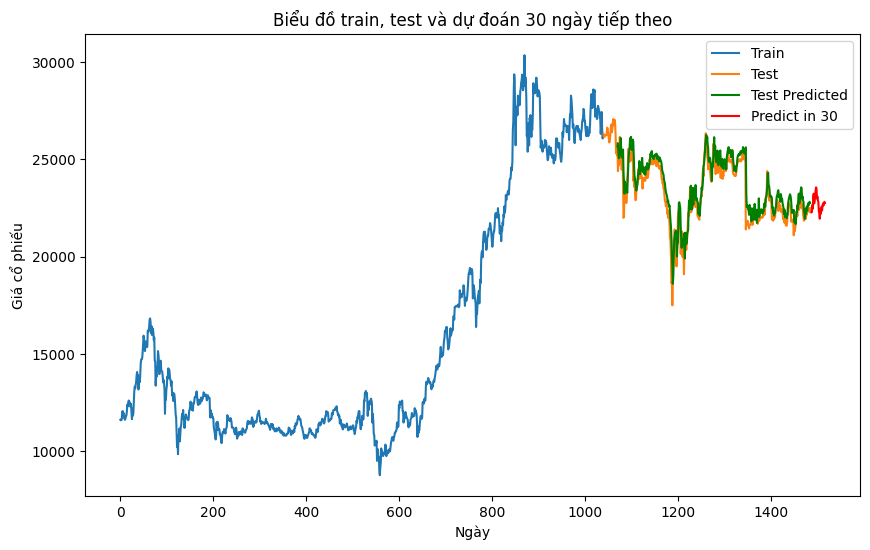

In [168]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [169]:
y_test_pred

array([[25666.697],
       [25828.162],
       [25343.807],
       [25065.178],
       [25078.525],
       [25218.004],
       [25687.43 ],
       [26104.682],
       [25570.75 ],
       [25470.676],
       [25093.87 ],
       [25110.182],
       [25507.59 ],
       [24377.58 ],
       [23732.303],
       [23239.168],
       [23865.092],
       [23734.781],
       [23481.357],
       [23333.309],
       [23593.531],
       [23283.334],
       [23873.928],
       [24543.865],
       [25177.213],
       [25348.   ],
       [25542.482],
       [26089.479],
       [25759.918],
       [26161.73 ],
       [25513.814],
       [25492.645],
       [25842.072],
       [26023.541],
       [25924.658],
       [25111.232],
       [24476.94 ],
       [23933.904],
       [24006.354],
       [23705.982],
       [23422.967],
       [23400.545],
       [23593.434],
       [23715.371],
       [24195.414],
       [24311.385],
       [24468.498],
       [24916.514],
       [24238.842],
       [24507.613],


In [170]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)

y_test1 = scaler.inverse_transform(y_test)


# Tính MAE cho testing
mae_test = mean_absolute_error(y_test1, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test1, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test1, y_test_predicted, squared=False)

# Tính MSLE cho testing
msle_test = mean_squared_log_error(y_test1, y_test_predicted, squared=False)




13/13 [==============================] - 0s 667us/step


In [171]:
y_test1

array([[25840.],
       [24400.],
       [24720.],
       [24720.],
       [24800.],
       [26160.],
       [25400.],
       [25360.],
       [24800.],
       [24480.],
       [24640.],
       [25280.],
       [23600.],
       [22000.],
       [22080.],
       [23400.],
       [23160.],
       [22880.],
       [23240.],
       [22760.],
       [23040.],
       [24000.],
       [24280.],
       [25440.],
       [25560.],
       [25240.],
       [24880.],
       [25350.],
       [25300.],
       [25300.],
       [24950.],
       [25700.],
       [25750.],
       [25200.],
       [23900.],
       [24100.],
       [23600.],
       [24100.],
       [23100.],
       [22900.],
       [23000.],
       [23750.],
       [23750.],
       [23800.],
       [23950.],
       [24500.],
       [24200.],
       [24000.],
       [24050.],
       [24250.],
       [24450.],
       [24200.],
       [24150.],
       [24000.],
       [23500.],
       [24000.],
       [24000.],
       [24050.],
       [24000.

In [172]:
mape_test *= 100


print('---------TEST----------')
print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))
print("MSLE:", round(msle_test,3))
print('-------------------')


---------TEST----------
MAPE: 2.187
MAE: 497.009
RMSE: 651.589
MSLE: 0.029
-------------------
